[참고](https://github.com/rickiepark/handson-ml2/blob/master/10_neural_nets_with_keras.ipynb)

- 인공 신경망(artificial neural network, ANN) <br/>
: 뇌에 있는 생물학적 뉴런의 네트워크에서 영감을 받은 머신러닝 모델. <br/>
딥러닝의 핵심으로 이미지 분류, 음성 인식 서비스 개선, 비디오 추천 등 복잡한 대규모 머신러닝 문제를 다루는 데 적합하다.

# 10.1 생물학적 뉴런에서 인공 뉴런까지
## 10.1.3 퍼셉트론
- 퍼셉트론(perceptron) : 입출력이 이진이 아닌 어떤 숫자기고, 각각의 입력 연결은 가중치와 연관되어 있는 가장 간단한 인공 신경망 구조 중 하나.
    - TLU : threshold logic unit 또는
    - LTU : linear threshold unit 이라고도 한다.
- 헤비사이드 계단 함수(Heaviside step function) : 퍼셉트론에서 가장 널리 사용되는 계단 함수. 이따금 부호 함수(sign function)를 대신함.
$$  \text{heaviside} (z) = \cases{{0} & z<0 \\ {1} & z=0 \\ {1} & z>0}  \ \ \ \ \ \text{sgn} (z) = \cases{-1 & z<0 \\ 0 & z=0 \\ +1 & z>0}$$

퍼셉트론은 층이 하나뿐인 TLU로 구성됨.
- 완전 연결 층(fully connected layer) : 한 층에 있는 모든 뉴런이 이전 층의 모든 뉴런과 연결되어 있는 경우. **밀집 층**(dense layer)이라고도 함.
- 입력 뉴런(input neuron) : 퍼셉트론이 입력하는 뉴런. 어떤 입력이든 그냥 출력으로 통과시킨다.
- 입력 층(input layer) : 모두 입력 뉴런으로 구성된 층. 보통 여기에 **편향** 특성이 더해진다($x_0 =1$).

- 헤브의 규칙(Hebb's rule) : 서로 활성화되는 세포가 서로 연결된다. **헤브의 학습**(Hebbian learning)이라고도 함. 가중치를 업데이트 하는 방법.

각 출력 뉴런의 결정 경계는 선형이므로 복잡한 패턴을 학습하지 못하지만,
- 퍼셉트론 수렴 이론(perceptron convergence theorem) : 훈련 샘플이 선형적으로 구분될 수 있다면 퍼셉트론 알고리즘이 정답에 수렴한다.

In [12]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = (iris.target == 0).astype(np.int) # 부채붓꽃(Iris Setosa)인가?

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

- 다층 퍼셉트론(MLP) : 퍼셉트론을 여러 개 쌓아올린 것. 퍼셉트론이 가진 일부 제약을 줄일 수 있다.

## 10.1.4 다층 퍼셉트론과 역전파
다층 퍼셉트론은 **입력층** 하나와 **은닉층**(hidden layer)이라 불리는 하나 이상의 TLU층과 마지막 **출력층**(output layer)으로 구성됨. 
- 하위 층(lower layer) : 입력층과 가까운 층
- 상위 층(upper layer) : 출력층과 가까운 층

출력층을 제외한 모든 층은 편향 뉴런을 포함하며 다음 층과 완전히 연결되어 있음.

- 피드포워드 신경망(feedforward neural network, FNN) : 신호는 입력에서 출력으로 한 방향으로만 흐르는 구조. 다중 퍼셉트론도 여기에 속한다.

- 심층 신경망(deep neural network, DNN) : 은닉층을 여러 개 쌓아 올린 인공 신경망. 
- **역전파**(backpropagation) 훈련 알고리즘 <br/> : 효율적인 기법으로 그레이디언트를 자동으로 계산하는 경사 하강법. 네트워크를 정방향 역방향 총 두 번 통과하는 것만으로 모든 모델 파라미터에 대한 네트워크 오차의 그레이디언트를 계산할 수 있다. 이를 통해 오차를 줄이기 위해 가중치와 편향이 어떻게 바뀌어야 하는지 알 수 있다. 
- 자동 미분(automatic differentiation) : 자동으로 그레이디언트를 계산하는 것. 역전파에서는 **후진 모드 자동 미분**(reverse-mode autodiff)을 사용.

- 에포크(epoch) : 하나의 미니배치씩 진행하여 전체 훈련 세트를 처리하는 과정을 *반복하는 횟수*.
- 정방향 계산(forward pass) : 각 미니배치는 입력층으로 전달되어 첫 번째 은닉층으로 보내지고, 해당 층의 모든 뉴런의 출력을 계산하여 다음 층으로 전달되는 식으로 출력층까지 계속된다.

1. 각 훈련 샘플에 대해 알고리즘이 먼저 예측을 만들고(정방향 계산) 오차를 측정한다.
2. 역방향으로 각 층을 거치면서 각 연결이 오차에 기여한 정도를 측정(역방향 계산).
3. 이 오차가 감소하도록 가중치를 조정(경사 하강법 단계).

은닉층의 연결 가중치를 랜덤하게 초기화하는 것이 중요. 

다층 퍼셉트론 구조에 계단 함수 대신 로지스틱(시그모이드) 함수 $\sigma (z) = 1/ (1+ \text{exp} (-z))$로 바꿔 쓴다. <br/>
계단 함수는 계산할 그레이디언트가 없지만 로지스틱 함수는 그레이디언트가 잘 정의되어 있다. <br/>
이 밖에도 쓸 수 있는 다른 활성화 함수는
- 하이퍼볼릭 탄젠트 함수(쌍곡 탄젠트 함수) <br/>
    $\tanh (z) = 2 \sigma (2z) -1 $. 로지스틱 함수처럼 S자 모양이고 연속적이며 미분 가능하지만 출력 범위가 -1과 1사이이다.
- ReLU 함수 <br/>
    $\text{ReLU} (z) = \max (0, z)$. 연속적이지만 $z=0$에서 미분 불가능. <br/> 
    그래도 실제로는 잘 작동하고 계산 속도가 빠르다는 장점이 있으며 출력에 최댓값이 없다는 점이 경사 하강법에 있는 일부 문제를 완화해줌.

In [10]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

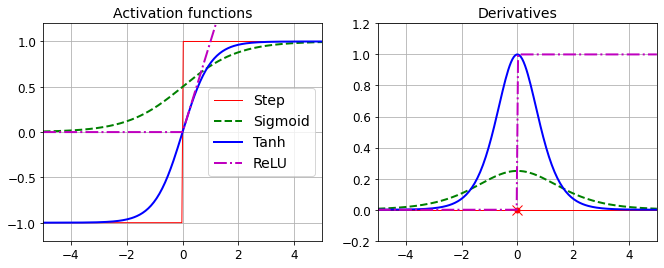

In [13]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

## 10.1.5 회귀를 위한 다층 퍼셉트론
$$ \text{softplus} (z) = \log (1 + \text{exp} (z) ) $$.
$z$가 음수일 때 0에 가까워지고 양수일 때 $z$에 가깝게 된다.

훈련에 사용하는 손실 함수는 전형적으로 평균 제곱 오차이다. 

## 10.1.6 분류를 위한 다층 퍼셉트론
다중 레이블 이진 분류(mutilabel binary classification) 문제를 쉽게 처리할 수 있음. <br/>
ex) 스팸 메일인지 아닌지 예측하고 동시에 긴급한 메일인지 아닌지 예측하는 이메일 분류 시스템

확률 분폴르 예측해야 하므로 손실 함수에는 일반적으로 크로스 엔트로피 손실(cross-entropy loss)을 선택하는 것이 좋음.

# 10.2 케라스로 다층 퍼셉트론 구현하기
## 10.2.1 텐서플로 2 설치

In [2]:
import tensorflow as tf
from tensorflow import keras

tf.__version__

'2.4.0'

In [3]:
keras.__version__

'2.4.0'

## 10.2.2 시퀀셜 API를 사용하여 이미지 분류기 만들기
### 케라스를 사용하여 데이터셋 적재하기

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [5]:
X_train_full.shape

(60000, 28, 28)

In [6]:
X_train_full.dtype

dtype('uint8')

In [7]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [9]:
class_names[y_train[0]]

'Coat'

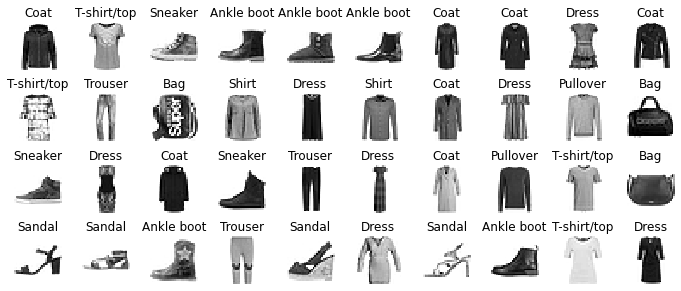

In [15]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

### 시퀀셜 API를 사용하여 모델 만들기

In [16]:
model = keras.models.Sequential() # 시퀀셜 모델 만들기
model.add(keras.layers.Flatten(input_shape=[28, 28])) # 첫 번째 층을 만들고 모델에 추가
model.add(keras.layers.Dense(300, activation="relu")) # Dense 은닉층 추가
model.add(keras.layers.Dense(100, activation="relu")) # 뉴런 100개를 가진 두 번째 Dense 은닉층 추가
model.add(keras.layers.Dense(10, activation="softmax")) # 클래스마다 하나씩 뉴런 10개를 가진 Dense 출력층 추가

In [17]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.layers

In [20]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [21]:
model.get_layer(hidden1.name) is hidden1

True

In [22]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [23]:
weights.shape

(784, 300)

In [24]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [26]:
biases.shape

(300,)

### 모델 컴파일

In [27]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd", # stochastic gradient descent
              metrics=["accuracy"])

### 모델 훈련과 평가

In [28]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 1.0187 - accuracy: 0.6807 - val_loss: 0.5207 - val_accuracy: 0.8234
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5028 - accuracy: 0.8260 - val_loss: 0.4345 - val_accuracy: 0.8538
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4485 - accuracy: 0.8423 - val_loss: 0.5341 - val_accuracy: 0.7988
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4211 - accuracy: 0.8529 - val_loss: 0.3915 - val_accuracy: 0.8644
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4062 - accuracy: 0.8580 - val_loss: 0.3748 - val_accuracy: 0.8690
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3756 - accuracy: 0.8671 - val_loss: 0.3707 - val_accuracy: 0.8728
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3655 - accuracy: 0.8709 - val_loss: 0.3623 - val_accuracy:

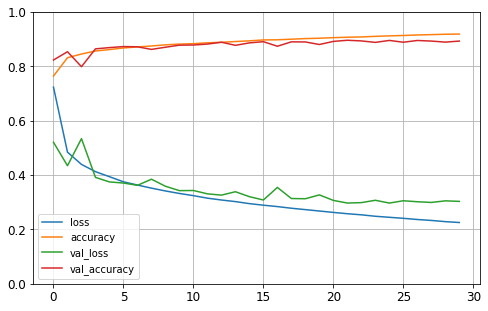

In [29]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # 수직축의 범위를 [0-1] 사이로 설정
plt.show()

In [30]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3377 - accuracy: 0.8827


[0.33773481845855713, 0.8827000260353088]

### 모델을 사용해 예측을 만들기

In [31]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.96],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [32]:
y_pred = model.predict_classes(X_new)
y_pred

C:\Users\sarah\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9, 2, 1], dtype=int64)

In [33]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [35]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

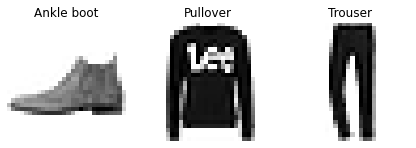

In [36]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## 10.2.3 시퀀셜 API를 사용하여 회귀용 다층 퍼셉트론 만들기

In [37]:
# 캘리포니아 주택 가격 데이터셋 이용
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [38]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3] # 새로운 샘플이라고 생각
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 2.2656 - val_loss: 0.8560
Epoch 2/20
363/363 [==============================] - 0s 832us/step - loss: 0.7413 - val_loss: 0.6531
Epoch 3/20
363/363 [==============================] - 0s 785us/step - loss: 0.6604 - val_loss: 0.6099
Epoch 4/20
363/363 [==============================] - 0s 843us/step - loss: 0.6245 - val_loss: 0.5658
Epoch 5/20
363/363 [==============================] - 0s 835us/step - loss: 0.5770 - val_loss: 0.5355
Epoch 6/20
363/363 [==============================] - 0s 793us/step - loss: 0.5609 - val_loss: 0.5173
Epoch 7/20
363/363 [==============================] - 0s 824us/step - loss: 0.5500 - val_loss: 0.5081
Epoch 8/20
363/363 [==============================] - 0s 937us/step - loss: 0.5200 - val_loss: 0.4799
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5051 - val_loss: 0.4690
Epoch 10/20
363/363 [==============================] - 0s 810us/step - loss: 0.4910 - 

## 10.2.4 함수형 API를 사용해 복잡한 모델 만들기

In [39]:
np.random.seed(42)
tf.random.set_seed(42)

input_ = keras.layers.Input(shape=X_train.shape[1:]) # input 객체 만들기
hidden1 = keras.layers.Dense(30, activation="relu")(input_) # Dense 층 만들기
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1) # 두 번째 은닉층 만들기
concat = keras.layers.concatenate([input_, hidden2]) # concatenate 층 만들기
output = keras.layers.Dense(1)(concat) # 하나의 뉴런과 출력층을 만들고 concat 층이 만든 결과를 사용해 호출
model = keras.models.Model(inputs=[input_], outputs=[output]) # 사용할 입력과 출력을 지정해 케라스 model 만들기

In [40]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [41]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 2.9131 - val_loss: 0.8560
Epoch 2/20
363/363 [==============================] - 0s 931us/step - loss: 0.8125 - val_loss: 0.6710
Epoch 3/20
363/363 [==============================] - 0s 945us/step - loss: 0.6876 - val_loss: 0.6169
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6241 - val_loss: 0.5710
Epoch 5/20
363/363 [==============================] - 0s 923us/step - loss: 0.5770 - val_loss: 0.5420
Epoch 6/20
363/363 [==============================] - 0s 997us/step - loss: 0.5416 - val_loss: 0.5176
Epoch 7/20
363/363 [==============================] - 0s 851us/step - loss: 0.5449 - val_loss: 0.5065
Epoch 8/20
363/363 [==============================] - 0s 854us/step - loss: 0.5136 - val_loss: 0.4790
Epoch 9/20
363/363 [==============================] - 0s 939us/step - loss: 0.4917 - val_loss: 0.4564
Epoch 10/20
363/363 [==============================] - 0s 940us/step - loss: 0.4781 - 

In [42]:
# 보조 출력
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [43]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))

In [44]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 4.0467 - main_output_loss: 3.6523 - aux_output_loss: 7.5962 - val_loss: 1.8045 - val_main_output_loss: 1.3439 - val_aux_output_loss: 5.9498
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 1.3263 - main_output_loss: 0.9168 - aux_output_loss: 5.0120 - val_loss: 0.9344 - val_main_output_loss: 0.6979 - val_aux_output_loss: 3.0635
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.9137 - main_output_loss: 0.6985 - aux_output_loss: 2.8500 - val_loss: 0.7760 - val_main_output_loss: 0.6271 - val_aux_output_loss: 2.1165
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7598 - main_output_loss: 0.6338 - aux_output_loss: 1.8944 - val_loss: 0.6953 - val_main_output_loss: 0.5732 - val_aux_output_loss: 1.7940
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6852 - main_output_loss: 0.5881 - aux_output_loss: 1.5591 - val_loss

In [45]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])

y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

162/162 [==============================] - 0s 811us/step - loss: 0.4622 - main_output_loss: 0.4211 - aux_output_loss: 0.8314


## 10.2.5 서브클래싱 API로 동적 모델 만들기

In [46]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

## 10.2.6 모델 저장과 복원

In [47]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

model.save("my_keras_model.h5")

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 3.9664 - val_loss: 1.1100
Epoch 2/10
363/363 [==============================] - 0s 901us/step - loss: 0.8267 - val_loss: 0.6990
Epoch 3/10
363/363 [==============================] - 0s 887us/step - loss: 0.6950 - val_loss: 0.6220
Epoch 4/10
363/363 [==============================] - 0s 915us/step - loss: 0.6612 - val_loss: 0.5969
Epoch 5/10
363/363 [==============================] - 0s 887us/step - loss: 0.6210 - val_loss: 0.5757
Epoch 6/10
363/363 [==============================] - 0s 862us/step - loss: 0.5938 - val_loss: 0.5644
Epoch 7/10
363/363 [==============================] - 0s 895us/step - loss: 0.5834 - val_loss: 0.5620
Epoch 8/10
363/363 [==============================] - 0s 887us/step - loss: 0.5519 - val_loss: 0.5210
Epoch 9/10
363/363 [==============================] - 0s 840us/step - loss: 0.5359 - val_loss: 0.5072
Epoch 10/10
162/162 [==============================] - 0s 570us/step - loss: 0.5010


In [48]:
# 모델 로드
model = keras.models.load_model("my_keras_model.h5")

## 10.2.7 콜백 사용하기

In [49]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3)) # 모델을 만들고 컴파일 하기

checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])

model = keras.models.load_model("my_keras_model.h5") # 최상의 모델로 롤백
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 3.3697 - val_loss: 0.7126
Epoch 2/10
363/363 [==============================] - 0s 912us/step - loss: 0.6964 - val_loss: 0.6880
Epoch 3/10
363/363 [==============================] - 0s 931us/step - loss: 0.6167 - val_loss: 0.5803
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5846 - val_loss: 0.5166
Epoch 5/10
363/363 [==============================] - 0s 860us/step - loss: 0.5321 - val_loss: 0.4895
Epoch 6/10
363/363 [==============================] - 0s 893us/step - loss: 0.5083 - val_loss: 0.4951
Epoch 7/10
363/363 [==============================] - 0s 868us/step - loss: 0.5044 - val_loss: 0.4861
Epoch 8/10
363/363 [==============================] - 0s 948us/step - loss: 0.4813 - val_loss: 0.4554
Epoch 9/10
363/363 [==============================] - 0s 986us/step - loss: 0.4627 - val_loss: 0.4413
Epoch 10/10
162/162 [==============================] - 0s 539us/step - loss: 0.4382


In [50]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4578 - val_loss: 0.4110
Epoch 2/100
363/363 [==============================] - 0s 882us/step - loss: 0.4430 - val_loss: 0.4266
Epoch 3/100
363/363 [==============================] - 0s 857us/step - loss: 0.4376 - val_loss: 0.3996
Epoch 4/100
363/363 [==============================] - 0s 915us/step - loss: 0.4361 - val_loss: 0.3939
Epoch 5/100
363/363 [==============================] - 0s 975us/step - loss: 0.4204 - val_loss: 0.3889
Epoch 6/100
363/363 [==============================] - 0s 838us/step - loss: 0.4112 - val_loss: 0.3866
Epoch 7/100
363/363 [==============================] - 0s 887us/step - loss: 0.4226 - val_loss: 0.3860
Epoch 8/100
363/363 [==============================] - 0s 901us/step - loss: 0.4135 - val_loss: 0.3793
Epoch 9/100
363/363 [==============================] - 0s 884us/step - loss: 0.4039 - val_loss: 0.3746
Epoch 10/100
363/363 [==============================] - 0s 956us/step - los

363/363 [==============================] - 0s 1ms/step - loss: 0.3323 - val_loss: 0.3354
Epoch 81/100
363/363 [==============================] - 0s 981us/step - loss: 0.3297 - val_loss: 0.3274
Epoch 82/100
363/363 [==============================] - 0s 884us/step - loss: 0.3441 - val_loss: 0.3167
Epoch 83/100
363/363 [==============================] - 0s 837us/step - loss: 0.3369 - val_loss: 0.3280
Epoch 84/100
363/363 [==============================] - 0s 898us/step - loss: 0.3182 - val_loss: 0.3634
Epoch 85/100
363/363 [==============================] - 0s 824us/step - loss: 0.3235 - val_loss: 0.3176
Epoch 86/100
363/363 [==============================] - 0s 835us/step - loss: 0.3184 - val_loss: 0.3156
Epoch 87/100
363/363 [==============================] - 0s 860us/step - loss: 0.3395 - val_loss: 0.3529
Epoch 88/100
363/363 [==============================] - 0s 906us/step - loss: 0.3264 - val_loss: 0.3258
Epoch 89/100
363/363 [==============================] - 0s 887us/step - loss: 0

In [51]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

## 10.2.8 텐서보드를 사용해 시각화하기


In [52]:
# 루트 로그 디렉토리 정의
import os

root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'.\\my_logs\\run_2021_01_12-10_40_59'

In [53]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3)) # 모델 구성과 컴파일

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 3.3697 - val_loss: 0.7126
Epoch 2/30
363/363 [==============================] - 0s 920us/step - loss: 0.6964 - val_loss: 0.6880
Epoch 3/30
363/363 [==============================] - 0s 915us/step - loss: 0.6167 - val_loss: 0.5803
Epoch 4/30
363/363 [==============================] - 0s 959us/step - loss: 0.5846 - val_loss: 0.5166
Epoch 5/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5321 - val_loss: 0.4895
Epoch 6/30
363/363 [==============================] - 0s 915us/step - loss: 0.5083 - val_loss: 0.4951
Epoch 7/30
363/363 [==============================] - 0s 873us/step - loss: 0.5044 - val_loss: 0.4861
Epoch 8/30
363/363 [==============================] - 0s 890us/step - loss: 0.4813 - val_loss: 0.4554
Epoch 9/30
363/363 [==============================] - 0s 871us/step - loss: 0.4627 - val_loss: 0.4413
Epoch 10/30
363/363 [==============================] - 0s 978us/step - loss: 0.4549 - 

In [55]:
# %load_ext tensorboard
# %tensorboard --logdir=./my_logs --port=6006 
# ??? 

In [57]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(test_logdir)
with writer.as_default() :
    for step in range(1, 1000 + 1) :
        tf.summary.scalar("my_scalar", np.sin(step/10), step=step)
        data = (np.random.randn(100) + 2) * step / 100 # 몇몇 랜덤 데이터
        tf.summary.histogram("my_hist", data, buckets=50, step=step)
        images = np.random.rand(2, 32, 32, 3) # 32x32 RGB 이미지
        tf.summary.image("my_images", images*step/1000, step=step)
        texts = ["The step is " + str(step), "Its square is " + str(step**2)]
        tf.summary.text("my_text", texts, step=step)
        sine_wave = tf.math.sin(tf.range(12000)/48000 *2 *np.pi *step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)